## Лабораторная работа 
### Шубина София Антоновна НПИбд-02-23

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline 

In [5]:
# загружаем данные
data = pd.read_csv('tv_advertising.csv')
data.head()

,Unnamed: 0,TV,Sales
0,0,44.5,10.4
1,1,17.2,9.3
2,2,180.8,12.9
3,3,8.7,7.2
4,4,57.5,11.8


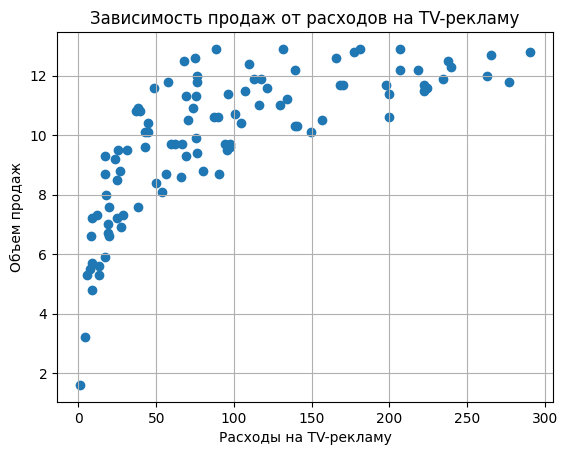

In [6]:
# разобьем данные на признаки и целевой показатель
data_x = data['TV']
data_y = data['Sales'] 

# построим график с правильными подписями
plt.scatter(data_x, data_y)
plt.title('Зависимость продаж от расходов на TV-рекламу')
plt.xlabel('Расходы на TV-рекламу')
plt.ylabel('Объем продаж')
plt.grid()
plt.show()

По графику видно, что данные выстраиваются вдоль некоторой кривой, следовательно можно предположить, что необходимо применять полиномиальную модель.
Но вначале построим прогноз простой линейной регрессией для сравнения результатов.

In [7]:
# разобьем данные на тренировочную и тестовую выборки в соотношении 75% на 25%
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=.25, random_state=12345) 

Обучаем модель линейной регрессии на тренировочных данных, строит прогноз на тестовой выборке и вычисляет коэффициент детерминации (R^2), который показывает, насколько хорошо модель объясняет вариацию целевой переменной.


In [8]:
# обучим модель линейной регрессии
model_lin = LinearRegression()
x_train = np.array(x_train).reshape(-1, 1)
model_lin.fit(x_train, y_train)

# построим прогноз на тестовой выборке, вычислим R2
x_test = np.array(x_test).reshape(-1, 1)
y_pred_lin = model_lin.predict(x_test) 
r2_lin = r2_score(y_test, y_pred_lin)

print(f'Линейная регрессия: на тестовой выборке R2={r2_lin:.3f}')

Линейная регрессия: на тестовой выборке R2=0.392


Строим **график остатков** линейной регрессии, то есть разниц между фактическими и предсказанными значениями.
На оси X — предсказанные значения модели, на оси Y — остатки.
Горизонтальная пунктирная линия — уровень нуля, относительно которого видно, как распределены ошибки.


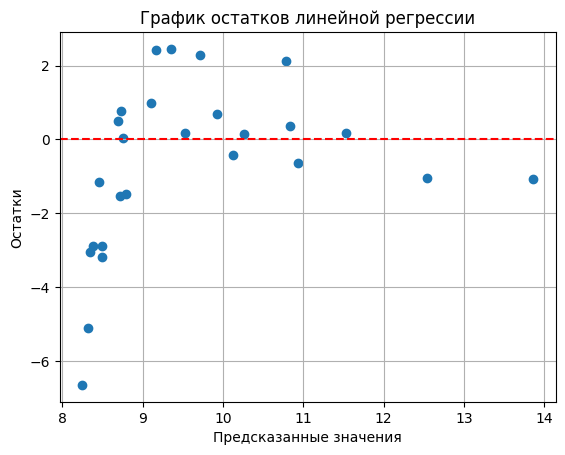

In [9]:
# построим график остатков линейной модели
residuals_lin = y_test - y_pred_lin
plt.scatter(y_pred_lin, residuals_lin)
plt.axhline(0, linestyle='--', color='red')
plt.title('График остатков линейной регрессии')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

График остатков показывает то, что линейная регрессия плохо описывает имеющиеся данные, потому что относительно оси данные сильно разброшены.

Этот код обучает **полиномиальную регрессию второй степени** (квадратичную модель), то есть модель, где зависимость между (x) и (y) описывается не прямой линией, а параболой.

* Создаётся конвейер (`make_pipeline`), который сначала добавляет новые признаки — степени исходного признака (x, x^2) — а затем применяет линейную регрессию к этим расширенным данным.
* После обучения модель делает предсказания на тестовой выборке, и вычисляется коэффициент детерминации (R^2), который показывает, насколько хорошо полиномиальная модель объясняет данные.


In [10]:
# обучим модель полиномиальной регрессии степени 2
degree = 2
model_poly = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LinearRegression()
)
model_poly.fit(x_train, y_train)

# построим прогноз на тестовой выборке, вычислим R2
y_pred_poly = model_poly.predict(x_test)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Полиномиальная регрессия (k={degree}):\
на тестовой выборке R2 = {r2_poly:.3f}")

Полиномиальная регрессия (k=2):на тестовой выборке R2 = 0.618


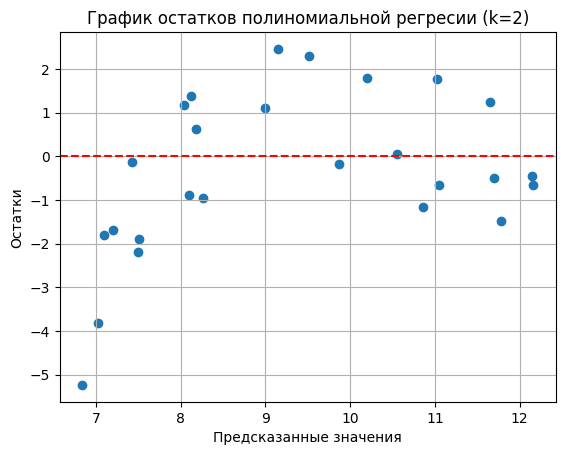

In [11]:
# построим график остатков полиномиальной модели степени 2
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(0, linestyle='--', color='red')
plt.title('График остатков полиномиальной регресии (k=2)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

По графику видно, что большинство значений равномерно распределены относительно 0, за исключением двух выбросов. Можно сделать вывод, что на данном примере полином второй степени лучше описывает зависимость данных.

Но при этом невозможно точно сказать, нужно ли увеличивать степень полинома.
Поэтому далее проведем подбор степени полинома оптимизируя ошибку на тестовых данных. 

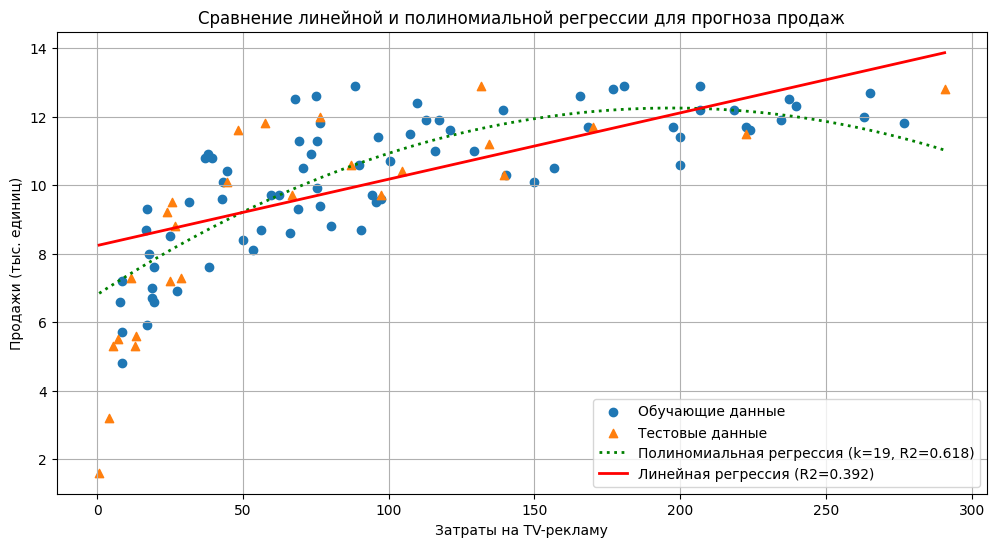

In [12]:
# сравним графически полиномиальную и линейную регрессии
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Обучающие данные')
plt.scatter(x_test, y_test, marker='^', label='Тестовые данные')

x_plot = np.linspace(data_x.min(), data_x.max(), 100).reshape(-1, 1)
y_plot_lin = model_lin.predict(x_plot) 
y_plot_poly = model_poly.predict(x_plot)

plt.plot(x_plot, 
         y_plot_poly, 
         color='green', 
         linestyle=':', 
         linewidth=2, 
         label=f'Полиномиальная регрессия (k={degree}, R2={r2_poly:.3f})')
plt.plot(x_plot, 
         y_plot_lin, 
         color='red', 
         linewidth=2, 
         label=f'Линейная регрессия (R2={r2_lin:.3f})')

plt.title('Сравнение линейной и полиномиальной регрессии для прогноза продаж')
plt.xlabel('Затраты на TV-рекламу')
plt.ylabel('Продажи (тыс. единиц)')
plt.legend()
plt.grid()
plt.show()

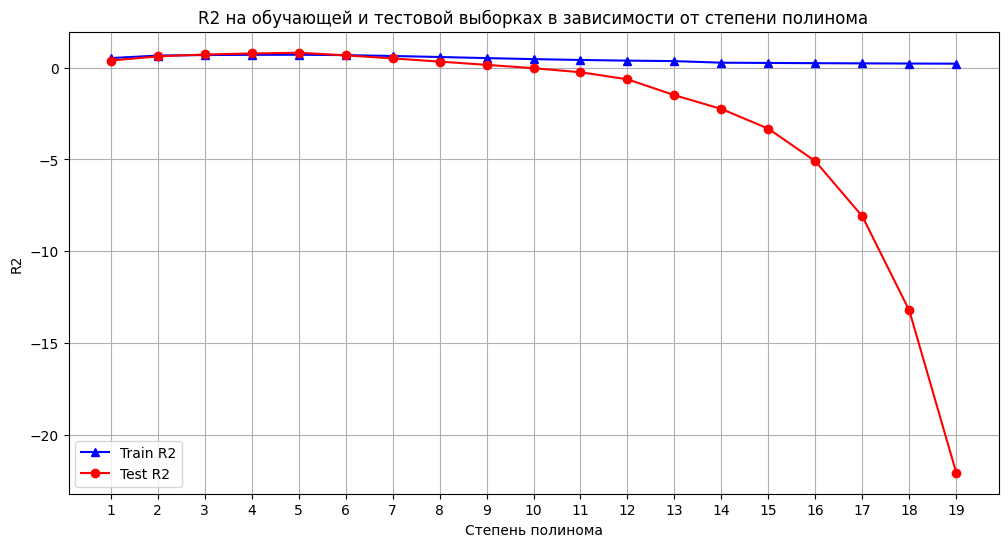

Лучший R2 на тестовой выборке: R2=0.82 достигается при k=5


In [13]:
# подберем наилучшую степень полинома отимизируя  R2
degrees = range(1,20) 
train_scores = []
test_scores = []
best_r2_test = 0
best_model = None

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    train_scores.append(r2_train)
    test_scores.append(r2_test)
    
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_degree = degree
        best_model = model

# построим график зависимости R2 от степени полинома
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_scores, 'b^-', label='Train R2')
plt.plot(degrees, test_scores, 'ro-', label='Test R2')
plt.title('R2 на обучающей и тестовой выборках в зависимости от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('R2')
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()

print(f"Лучший R2 на тестовой выборке: \
R2={best_r2_test:.2f} достигается при k={best_degree}")

Несмотря на то, что наилучший показатель R2 достигается при k=5, на графике зависимости R2 от степени полинома видно, что для k=2,3,4,5,6,7 значение R2 меняется слабо, это говорит о том, что качество всех этих моделей близко.

В этом случае оптимальная модель будет при k=2 или k=3 - имеем схожее качество, при этом модель не сильно усложнена.

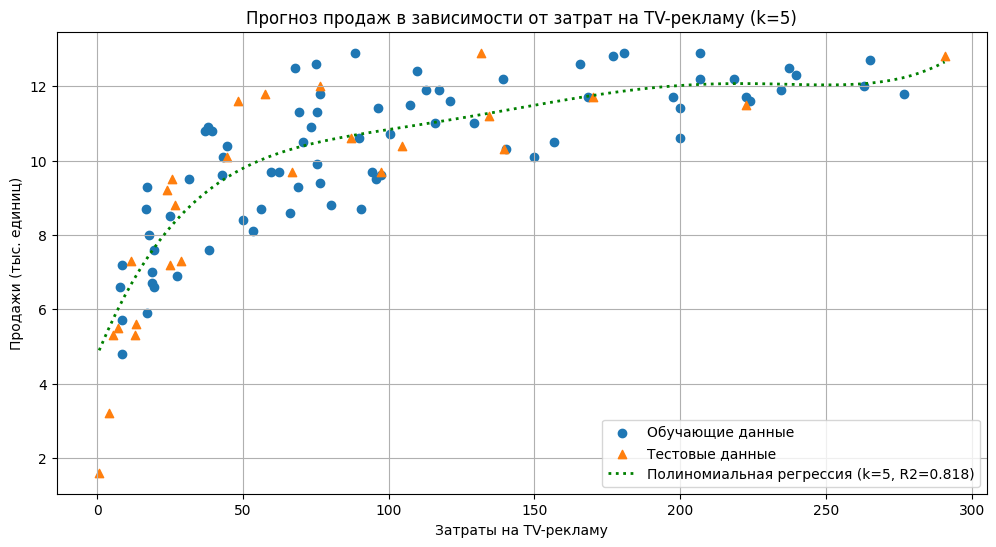

In [15]:
# построим график полиномиальной кривой
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Обучающие данные')
plt.scatter(x_test, y_test, marker='^', label='Тестовые данные')

x_plot = np.linspace(data_x.min(), data_x.max(), 100).reshape(-1, 1)
y_plot_poly = best_model.predict(x_plot)

plt.plot(x_plot, 
         y_plot_poly, 
         color='green', 
         linestyle=':', 
         linewidth=2, 
         label=f'Полиномиальная регрессия (k={best_degree}, R2={best_r2_test:.3f})')
plt.title(f'Прогноз продаж в зависимости от затрат на TV-рекламу (k={best_degree})')
plt.xlabel('Затраты на TV-рекламу')
plt.ylabel('Продажи (тыс. единиц)')
plt.legend()
plt.grid()
plt.show()

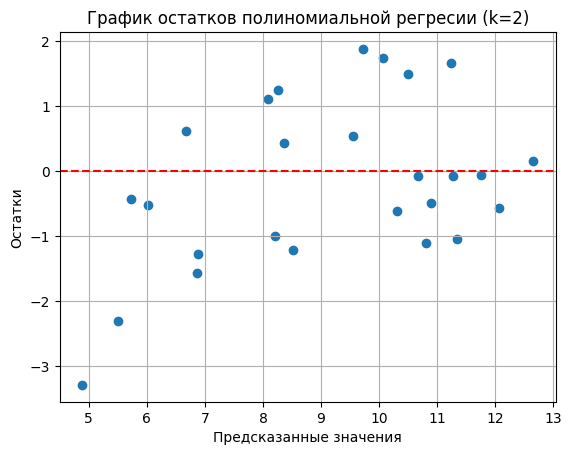

In [14]:
# построим прогноз на тестовой выборке 
y_pred_poly = best_model.predict(x_test)

# построим график остатков полиномиальной модели с оптимальными параметрами
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(0, linestyle='--', color='red')
plt.title('График остатков полиномиальной регресии (k=2)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

# Вывод
График остатков для полинома 5 степени не сильно отличается от графика остатков полинома 2 степени: также большинство данных равномерно распределены около 0, однако имеются некоторые выбросы. Это говорит о том, что обе модели адекватно описывают имеющуюся зависимость в данных. Это видно и на графике зависимости R2 от степени полинома.

В ходе выполнения лабораторной работы была успешно решена задача прогнозирования объема продаж в зависимости от затрат на телевизионную рекламу с использованием полиномиальной регрессии. Анализ данных показал наличие нелинейной зависимости между переменными что подтвердило целесообразность применения полиномиальных моделей вместо линейной регрессии. Методом перебора степеней полинома от 1 до 19 была найдена оптимальная модель обеспечивающая наилучшее качество прогнозирования на тестовой выборке. Визуальное сравнение линейной и полиномиальной регрессии наглядно продемонстрировало преимущество последней в описании исходных данных. Наибольший коэффициент детерминации R² на тестовой выборке составил 0.82 что свидетельствует о высокой объясняющей способности модели. Однако учитывая небольшой объем исходных данных и риск переобучения для практического применения рекомендуется использовать более простые модели со степенями 2-4 которые показывают сопоставимое качество но обладают большей устойчивостью и лучшей интерпретируемостью.